In [1]:
from sqlalchemy import * # package providing unified access to various databases
from sqlalchemy.orm import *
import os                # for checking existence/removing of a file
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///create.db",echo=False)
session = Session(engine)

%load_ext sql
%sql sqlite:///create.db

  Universityid        Name                   Email  Taskid          Title  \
0     s3015725  Orla Lloyd  s3015725@leidenuniv.nl       0  Task Title 67   
1     s3015725  Orla Lloyd  s3015725@leidenuniv.nl       0  Task Title 67   
2     s3015725  Orla Lloyd  s3015725@leidenuniv.nl       0  Task Title 67   
3     s3015725  Orla Lloyd  s3015725@leidenuniv.nl       0  Task Title 67   
4     s3015725  Orla Lloyd  s3015725@leidenuniv.nl       0  Task Title 67   

   Submissionid Evalution Evaluation_request Comments  \
0             1   Pending      Not Requested     None   
1             1   Pending      Not Requested     None   
2             1   Pending      Not Requested     None   
3             1   Pending      Not Requested     None   
4             1   Pending      Not Requested     None   

                                            Text  
0  Example Answer text 67: My solution is ......  
1  Example Answer text 67: My solution is ......  
2  Example Answer text 67: My solution is

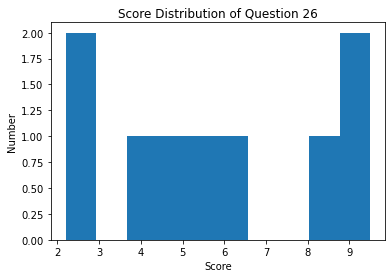

In [3]:
#return a dataframe of teacher summary table
def teacherSumDF():
    Teacher_summary = pd.read_sql("""SELECT Students.Universityid, Students.Name, Students.Email, Task.Taskid, Task.Title,
    Submission.Submissionid, Submission.Evaluation_finished AS Evalution, Submission.Evaluation_request, 
    Submission.Evaluation AS Comments, Answer.text
        FROM Students
        INNER JOIN Assignment USING (Universityid)
        INNER JOIN Task USING (Taskid)
        INNER JOIN Submission USING (Assignmentid)
        INNER JOIN Answer USING (Submissionid)""", engine)
        
    Teacher_summary.loc[Teacher_summary["Evalution"] != 0, "Evalution"] = "Finished"
    Teacher_summary.loc[Teacher_summary["Evalution"] == 0, "Evalution"] = "Pending"
    Teacher_summary.loc[Teacher_summary["Evaluation_request"] != 0, "Evaluation_request"] = "Requested"
    Teacher_summary.loc[Teacher_summary["Evaluation_request"] == 0, "Evaluation_request"] = "Not Requested"
    
    return(Teacher_summary)

#return a dataframe of a single student evaluation status
def singleStudentEval(Universityid):
    Teacher_summary = teacherSumDF()
    singTeacher_summary = Teacher_summary[Teacher_summary["Universityid"] == Universityid]
    
    return(singTeacher_summary)
    
#return a chart showing score distribution of a specified question 
def scoreChart(Questionid):
    a = pd.read_sql("""SELECT Students.Universityid, Students.Name, Students.Email, Task.Taskid, Submission.Submissionid,
    Score.Value AS Score, Answer.Answerid, Answer.Questionid, Question.Title
        FROM Students
        INNER JOIN Assignment USING (Universityid)
        INNER JOIN Task USING (Taskid)
        INNER JOIN Submission USING (Assignmentid)
        INNER JOIN Score USING (Submissionid)
        INNER JOIN Answer USING (Answerid)
        INNER JOIN Question USING (Questionid)""", engine)
 
    a = a[a['Questionid']== Questionid]
    plt.hist(a['Score'])
    
    plt.title('Score Distribution of Question '+ str(Questionid))
    plt.xlabel('Score')
    plt.ylabel('Number')
    plt.show()
    
print(teacherSumDF().head())
print(singleStudentEval('s3015725'))
scoreChart(26)